In [1]:
# Including Libraries
# necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle
from nltk.corpus import wordnet

In [2]:
#We will import the file through the pandas 
TrueNews = pd.read_csv("True.csv")
FakeNews = pd.read_csv("Fake.csv")
#Let's check our data
print(TrueNews.head(5))
#print(FakeNews.head(5))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [3]:
#Checking shape for both files
print(TrueNews.shape)
print(FakeNews.shape)

(21417, 4)
(23481, 4)


In [4]:
print('FAKE',FakeNews.isnull().sum())
print('TRUE',TrueNews.isnull().sum())

FAKE title      0
text       0
subject    0
date       0
dtype: int64
TRUE title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
#Columns Print
print(list(TrueNews.columns))
print(list(FakeNews.columns))

['title', 'text', 'subject', 'date']
['title', 'text', 'subject', 'date']


In [6]:
#We are adding label fake and true
TrueNews['label'] = 'True'
TrueNews.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
FakeNews['label'] = 'Fake'
FakeNews.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [8]:
TrueNews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [9]:
#Let's concatenate the dataframes
frames = [TrueNews, FakeNews]
news_dataset = pd.concat(frames)
news_dataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
#New combined dataset 
news_dataset.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [11]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [12]:
final_data = news_dataset.dropna()

In [13]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
# Removing the date 
final_data.drop(["date"],axis=1,inplace=True)
final_data.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [15]:
# Removing the title
final_data.drop(["title"],axis=1,inplace=True)
final_data.head()

,text,subject,label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [16]:
#First lets convert our data into lower case 
final_data['text'] = final_data['text'].apply(lambda x: x.lower())
#final_data['title'] = final_data['title'].apply(lambda x: x.lower())
final_data.head()

,text,subject,label
0,washington (reuters) - the head of a conservat...,politicsNews,True
1,washington (reuters) - transgender people will...,politicsNews,True
2,washington (reuters) - the special counsel inv...,politicsNews,True
3,washington (reuters) - trump campaign adviser ...,politicsNews,True
4,seattle/washington (reuters) - president donal...,politicsNews,True


In [17]:
# Drop odd rows
#final_data = final_data.iloc[::2]

In [18]:
#New combined dataset 
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38646,8,2
top,,politicsNews,Fake
freq,627,11272,23481


In [19]:
# Drop odd rows
#final_data = final_data.iloc[::2]

In [20]:
#New combined dataset 
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38646,8,2
top,,politicsNews,Fake
freq,627,11272,23481


In [21]:
#Removing punctuation
import string

def remove_punctuation(text):
    #all_list = [char for char in text if char not in string.punctuation]
    #no_punct = ''.join(all_list)
    translator = str.maketrans('', '',string.punctuation)
    no_punct = text.translate(translator)
    return no_punct

final_data['text'] = final_data['text'].apply(remove_punctuation)

In [22]:
# Verifying
final_data.head()

,text,subject,label
0,washington reuters the head of a conservative...,politicsNews,True
1,washington reuters transgender people will be...,politicsNews,True
2,washington reuters the special counsel invest...,politicsNews,True
3,washington reuters trump campaign adviser geo...,politicsNews,True
4,seattlewashington reuters president donald tr...,politicsNews,True


In [23]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

final_data['text'] = final_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
final_data.head()

,text,subject,label
0,washington reuters head conservative republica...,politicsNews,True
1,washington reuters transgender people allowed ...,politicsNews,True
2,washington reuters special counsel investigati...,politicsNews,True
3,washington reuters trump campaign adviser geor...,politicsNews,True
4,seattlewashington reuters president donald tru...,politicsNews,True


In [25]:
final_data = final_data.sample(frac = 1)

In [26]:
final_data.head()

,text,subject,label
22582,tune alternate current radio network acr anoth...,US_News,Fake
1980,reuters trump administration blocked rule requ...,politicsNews,True
14654,saw live cavuto great ted turner jr stumping b...,politics,Fake
5576,secret trump campaign exactly raking donations...,News,Fake
19358,republicans put forward plan stop obama admini...,left-news,Fake


In [27]:
final_data.describe()

,text,subject,label
count,44898,44898,44898
unique,38636,8,2
top,,politicsNews,Fake
freq,632,11272,23481


In [28]:
final_data.to_csv('final_data.csv')

In [29]:
# Function to plot the confusion matrix 
# This function prints and plots the confusion matrix
# Normalization can be applied by setting 'normalize=True'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
x = final_data['text']
y = final_data['label']

In [31]:
# Convert the class labels from strings to integers
y = np.array([1 if label == "True" else 0 for label in y])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
# Transform the training data into bag of words features using the CountVectorizer
count_vectorizer = CountVectorizer()

x_train_bow = count_vectorizer.fit_transform(x_train)

In [34]:
# Transform the test data into bag of words features using the CountVectorizer

x_test_bow = count_vectorizer.transform(x_test)

In [35]:
# Get the feature names of 'count_vectorizer'

print(count_vectorizer.get_feature_names()[:10])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '0000', '000000017', '000004', '000048', '000063sz', '00009', '0001', '00011']


In [36]:
from collections import defaultdict
from scipy.sparse import csr_matrix

def train_naive_bayes(X, y, alpha=1.0):
    # Convert X to a sparse matrix
    X_sparse = csr_matrix(X)
    
    # Calculate the number of fake and real news articles in the training set
    num_fake = y.sum()
    num_real = len(y) - num_fake
    
    # Calculate the probability of a news article being fake or real
    p_fake = (num_fake + alpha) / (len(y) + 2 * alpha)
    p_real = (num_real + alpha) / (len(y) + 2 * alpha)
    
    # Calculate the probability of each word appearing in a fake or real news article
    fake_word_probs = defaultdict(int)
    real_word_probs = defaultdict(int)
    for i in range(X_sparse.shape[0]):
        article = X_sparse[i, :]
        words = article.indices
        for index in words:
            if y[i] == 1:  # News article is fake
                fake_word_probs[index] += 1
            else:  # News article is real
                real_word_probs[index] += 1
    
    # Normalize the word counts to obtain probabilities
    for word in fake_word_probs:
        fake_word_probs[word] = (fake_word_probs[word] + alpha) / (num_fake + 2 * alpha)
    for word in real_word_probs:
        real_word_probs[word] = (real_word_probs[word] + alpha) / (num_real + 2 * alpha)
    
    # Save the trained model using pickle
    model = {"p_fake": p_fake, "p_real": p_real, "fake_word_probs": fake_word_probs, "real_word_probs": real_word_probs}
    with open("naive_bayes_model.pkl", "wb") as f:
        pickle.dump(model, f)
        
    return p_fake, p_real, fake_word_probs, real_word_probs


def predict_fake_news(X, p_fake, p_real, fake_word_probs, real_word_probs, alpha=1):
    y_pred = []
    num_fake = 0
    num_real = 0
    for i in range(X.shape[0]):
        article = X[i, :]
        p_real_article = 1.0
        p_fake_article = 1.0
        words = article.nonzero()[1]
        for index in words:
            if index in fake_word_probs:
                p_fake_article *= fake_word_probs[index]
            else:
                p_fake_article *= alpha / (num_fake + 2 * alpha)
            if index in real_word_probs:
                p_real_article *= real_word_probs[index]
            else:
                p_real_article *= alpha / (num_real + 2 * alpha)
        
        # Predict the class label of the news article
        if p_fake_article * p_fake > p_real_article * p_real:
            y_pred.append(1)
        else:
            y_pred.append(0)
        
        if y_pred[-1] == 1:
            num_fake += 1
        else:
            num_real += 1
    
    return np.array(y_pred)

# Saving the predict fake news
with open('predict_fake_news.pkl', 'wb') as f:
    pickle.dump(predict_fake_news, f)


In [37]:
# Train the Naive Bayes classifier
p_fake, p_real, fake_word_probs, real_word_probs = train_naive_bayes(x_train_bow, y_train)

In [38]:
# Predict the class labels of the test set
y_pred = predict_fake_news(x_test_bow, p_fake, p_real, fake_word_probs, real_word_probs)

In [39]:
# Evaluate the performance of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 82.56%


In [40]:
np.unique(y_test)

array([0, 1])

Confusion matrix, without normalization


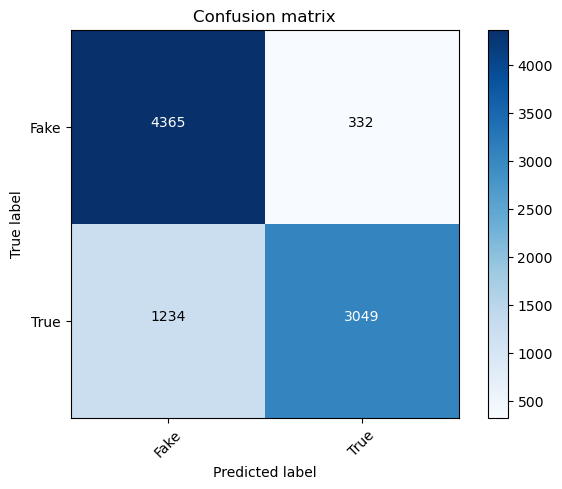

In [55]:
cm1 = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm1, classes=['Fake', 'True'])

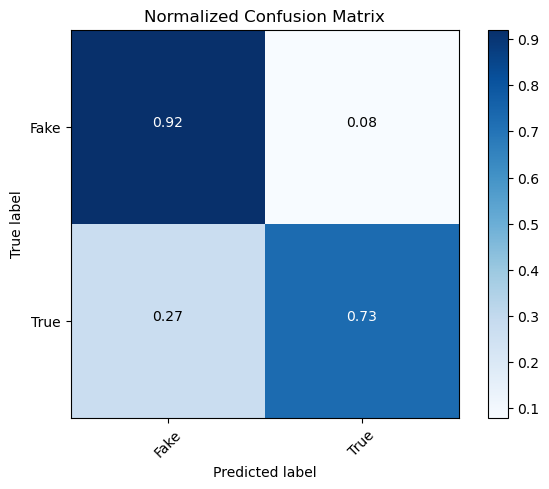

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, tfidf_pred, labels=[0, 1], normalize='true')

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['0', '1']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# add labels to cells
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, '{:.2f}'.format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [42]:
print(cm1)

[[4365  332]
 [1234 3049]]


In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4697
           1       0.90      0.71      0.80      4283

    accuracy                           0.83      8980
   macro avg       0.84      0.82      0.82      8980
weighted avg       0.84      0.83      0.82      8980



In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [45]:
# get feature names

# Get the feature names of 'tfidf_vectorizer'

print(tfidf_vectorizer.get_feature_names()[-10:])

['zyklon', 'zynga', 'zypries', 'zyries', 'zyuganov', 'zyuseragentifzxzbreak', 'zzbluecomet', 'zztaine', 'zzzzaaaacccchhh', 'zzzzzzzz']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
# Train the Naive Bayes classifier
p_fake, p_real, fake_word_probs, real_word_probs = train_naive_bayes(tfidf_train, y_train)

In [47]:
# Predict the class labels of the test set
tfidf_pred = predict_fake_news(tfidf_test, p_fake, p_real, fake_word_probs, real_word_probs)

In [48]:
# Evaluate the performance of the classifier
accuracy = np.mean(tfidf_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 82.95%


Confusion matrix, without normalization


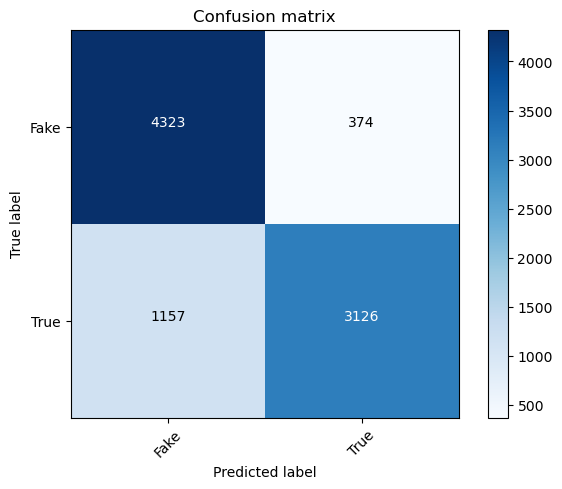

In [54]:
cm1 = metrics.confusion_matrix(y_test, tfidf_pred, labels=[0, 1])
plot_confusion_matrix(cm1, classes=['Fake', 'True'])

In [50]:
print(cm1)

[[4323  374]
 [1157 3126]]


In [51]:
print(metrics.classification_report(y_test, tfidf_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4697
           1       0.89      0.73      0.80      4283

    accuracy                           0.83      8980
   macro avg       0.84      0.83      0.83      8980
weighted avg       0.84      0.83      0.83      8980



In [52]:
# Save the tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


In [53]:
var = input("Please enter the news text you want to verify: ")
# function to run for prediction
def detecting_fake_news(var):  
    #retrieving the best model for prediction call
    # Load the saved model
    with open('naive_bayes_model.pkl', 'rb') as file:
        model_train = pickle.load(file)
        
    # Load the vecrotizer 
    with open('tfidf_vectorizer.pkl', 'rb') as file:
        model_vectorizer = pickle.load(file)
  
    # Convert the input to a 2-dimensional array with shape (1, num_features)
    X = model_vectorizer.transform([var])
    
    # Predict the class label of the new data
    prediction = predict_fake_news(X, model_train["p_fake"], model_train["p_real"], 
                            model_train["fake_word_probs"], model_train["real_word_probs"])

    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: tune alternate current radio network acr another live broadcast boiler room starting 6 pm pst 9 pm est every wednesday join us uncensored uninterruptible talk radio custommade barfly philosophers misguided moralists masochists street corner evangelists mediamaniacs savants political animals otherwise lovable rascalsjoin acr hosts hesher spore along patrick henningsen 21wire sunday wire regular basil valentine mike robinson uk column branko mali kali tribune tonight boiler gang brings internet show left hooks right jabs ear biting 90 tyson prize fight discussing panama papers utter nonsense poverty pimp bob geldof charging upwards 100000 speak ending poverty rand paul introducing bill would limit sale arms saudi government wake atrocities yemen destruction culture design potential rise european union military force basil takes pope task ridiculous publicity stunt picked 12 migrants come popejet back vatican city branko mali schools us orwel